In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
file_path = "large_movies_data_with_details.csv"
df = pd.read_csv(file_path)
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,homepage,imdb_id,origin_country,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline
0,False,/zxxIzU6XjzTQKS9pPeLmYTDTFL1.jpg,"[35, 80]",209189,en,Life of Crime,Two common criminals get more than they bargai...,5.395,/apO5xGmcEHpdIBc3Zreax7MXl2m.jpg,2013-09-14,...,NaN,tt1663207,['US'],"[{'id': 23700, 'logo_path': None, 'name': 'Abb...","[{'iso_3166_1': 'US', 'name': 'United States o...",265452,94,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Right target. Wrong woman.
1,False,/69EFgWWPFWbRNHmQgYdSnyJ94Ge.jpg,"[28, 12, 878]",49521,en,Man of Steel,A young boy learns that he has extraordinary p...,4.600,/dksTL9NXc3GqPBRHYHcy1aIwjS.jpg,2013-06-12,...,https://www.warnerbros.com/movies/man-steel,tt0770828,['US'],"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",668045518,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You will believe that a man can fly.
2,False,/63y4XSVTZ7mRzAzkqwi3o0ajDZZ.jpg,"[80, 18, 35]",106646,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,4.579,/kW9LmvYHAaS9iA0tHmZVq8hQYoq.jpg,2013-12-25,...,http://www.thewolfofwallstreet.com/,tt0993846,['US'],"[{'id': 19177, 'logo_path': None, 'name': 'Red...","[{'iso_3166_1': 'US', 'name': 'United States o...",392000000,180,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Earn. Spend. Party.
3,False,/AgWnDRoGbbE6oXJWZpQVQWWzaUa.jpg,[35],209244,en,Are You Here,"When Steve Dallas, a womanizing local weatherm...",5.338,/v83MAkGH8jF8uNhJhKgADqw3Xup.jpg,2013-09-07,...,NaN,tt1545754,['US'],"[{'id': 10161, 'logo_path': None, 'name': 'Gil...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friendship... there's nothing in it for anybody.
4,False,/xEY0MV2jSQBz9iOJfCFvLTiPGMA.jpg,"[53, 80]",75656,en,Now You See Me,An FBI agent and an Interpol detective track a...,4.280,/tWsNYbrqy1p1w6K9zRk0mSchztT.jpg,2013-05-29,...,NaN,tt1670345,['US'],"[{'id': 491, 'logo_path': '/5LvDUt3KmvRnXQ4Nrd...","[{'iso_3166_1': 'US', 'name': 'United States o...",351723989,116,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"The closer you look, the less you’ll see."


   popularity  vote_average  vote_count    budget   revenue   runtime
0    2.157861     -1.401355   -0.780780 -0.546528 -0.571705 -0.711361
1    0.863124     -0.199760    2.226078  2.588492  1.773373  1.339033
2    0.828924      1.609094    4.057645  0.748691  0.803970  2.887289
3    2.065031     -2.047374   -0.803959 -0.723149 -0.572637  0.125534
4    0.341972      0.712419    2.299848  0.380731  0.662530  0.209224
Silhouette Scores for Different K values: {2: 0.41382902342332994, 3: 0.22355216191944907, 4: 0.2539186007951429, 5: 0.2606222689600148, 6: 0.2789744867726022, 7: 0.2680735215278817, 8: 0.2530456677075492, 9: 0.2379912693776801, 10: 0.25658930327934243}


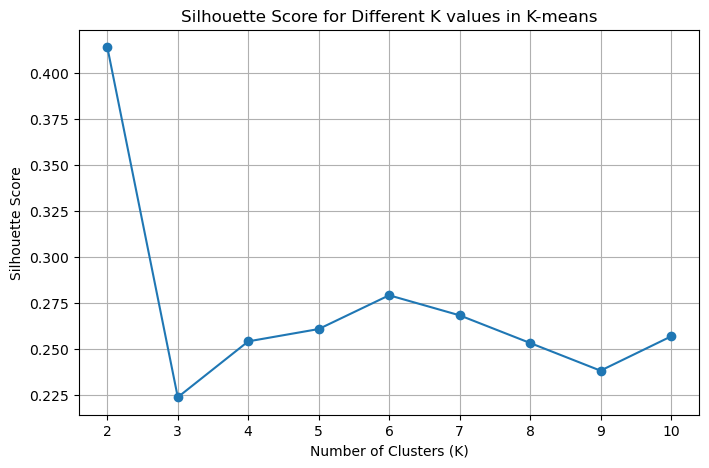

K-Means (k=2) Silhouette Score: 0.41382902342332994


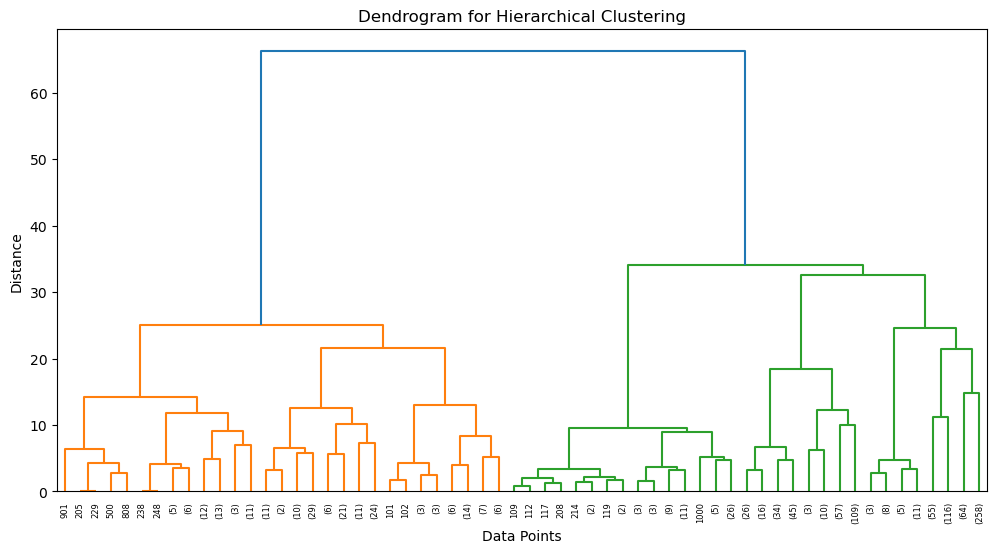

Hierarchical Clustering Silhouette Score: 0.4318489378050875
DBSCAN Silhouette Score: 0.5029717087833385
Number of clusters found by DBSCAN: 1


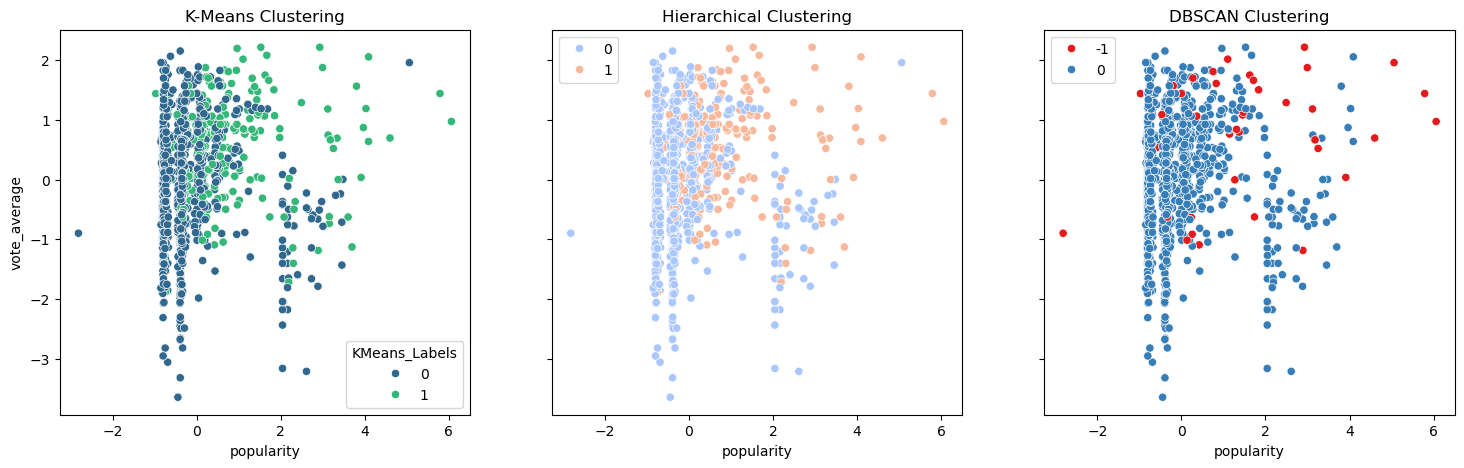

In [2]:
# Selecting relevant numerical columns for clustering
numerical_cols = ["popularity", "vote_average", "vote_count", "budget", "revenue", "runtime"]
df_numerical = df[numerical_cols].copy()

# Handling missing values by filling with median
df_numerical.fillna(df_numerical.median(), inplace=True)

# Standardizing the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

print(df_scaled.head())

# K-Means Clustering with silhouette score evaluation
silhouette_scores = {}
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, cluster_labels)

# Print silhouette scores
print("Silhouette Scores for Different K values:", silhouette_scores)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, list(silhouette_scores.values()), marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K values in K-means")
plt.grid()
plt.show()

# Best K from silhouette analysis
best_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

df_scaled["KMeans_Labels"] = kmeans_labels

# Print best K value and silhouette score
best_k_silhouette = silhouette_scores[best_k]
print(f"K-Means (k={best_k}) Silhouette Score: {best_k_silhouette}")

# Hierarchical Clustering with Dendrogram
hclust_linkage = linkage(df_scaled, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(hclust_linkage, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Hierarchical Clustering Silhouette Score
hclust_labels = kmeans_labels  # Approximation using k-means labels
hclust_silhouette = silhouette_score(df_scaled, hclust_labels)
print(f"Hierarchical Clustering Silhouette Score: {hclust_silhouette}")

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df_scaled["DBSCAN_Labels"] = dbscan_labels

# DBSCAN Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not find enough clusters to calculate a meaningful silhouette score.")

# Print number of clusters in DBSCAN
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters found by DBSCAN:", num_clusters_dbscan)

# Visualization of clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
sns.scatterplot(x=df_scaled["popularity"], y=df_scaled["vote_average"], hue=df_scaled["KMeans_Labels"], ax=axes[0], palette="viridis")
axes[0].set_title("K-Means Clustering")

sns.scatterplot(x=df_scaled["popularity"], y=df_scaled["vote_average"], hue=kmeans_labels, ax=axes[1], palette="coolwarm")
axes[1].set_title("Hierarchical Clustering")

sns.scatterplot(x=df_scaled["popularity"], y=df_scaled["vote_average"], hue=dbscan_labels, ax=axes[2], palette="Set1")
axes[2].set_title("DBSCAN Clustering")

plt.show()

In [3]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock
from sklearn.metrics.pairwise import cosine_similarity

# Sample Data Points (Movies with Features: Popularity, Vote Average, Revenue)
movie_1 = np.array([7.8, 8.5, 50000000])
movie_2 = np.array([6.3, 7.2, 12000000])

# 1. Euclidean Distance
euclidean_dist = euclidean(movie_1, movie_2)
print(f"Euclidean Distance between movies: {euclidean_dist}")

# 2. Manhattan Distance (L1 norm)
manhattan_dist = cityblock(movie_1, movie_2)
print(f"Manhattan Distance between movies: {manhattan_dist}")

# 3. Cosine Similarity
cosine_sim = cosine_similarity([movie_1], [movie_2])[0][0]
print(f"Cosine Similarity between movies: {cosine_sim}")


Euclidean Distance between movies: 38000000.00000005
Manhattan Distance between movies: 38000002.8
Cosine Similarity between movies: 0.9999999999998394


In [5]:
# K-Means Clustering with silhouette score evaluation
silhouette_scores = {}
k_values = [2, 3, 4]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, cluster_labels)
    print(f"K-Means (k={k}) Silhouette Score: {silhouette_scores[k]}")

# Print silhouette scores
print("Silhouette Scores for Different K values:", silhouette_scores)


K-Means (k=2) Silhouette Score: 0.4320342092218448
K-Means (k=3) Silhouette Score: 0.22097315329565576
K-Means (k=4) Silhouette Score: 0.25129478424437596
Silhouette Scores for Different K values: {2: 0.4320342092218448, 3: 0.22097315329565576, 4: 0.25129478424437596}


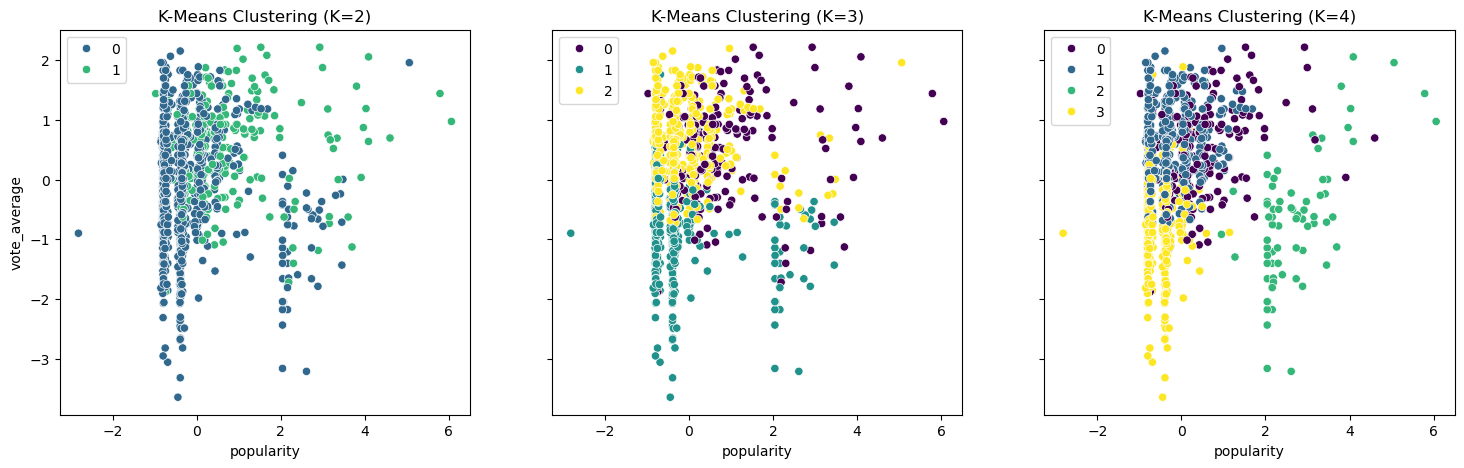

In [6]:
# K-Means clustering for K = 2, 3, 4
k_values = [2, 3, 4]
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    
    sns.scatterplot(x=df_scaled["popularity"], y=df_scaled["vote_average"], hue=labels, palette="viridis", ax=axes[i])
    axes[i].set_title(f"K-Means Clustering (K={k})")

plt.show()